In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.1935 - accuracy: 0.9419 - val_loss: 0.1132 - val_accuracy: 0.9651
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0800 - accuracy: 0.9749 - val_loss: 0.0949 - val_accuracy: 0.9708
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0517 - accuracy: 0.9830 - val_loss: 0.0871 - val_accuracy: 0.9755
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.0819 - val_accuracy: 0.9775
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0773 - val_accuracy: 0.9789


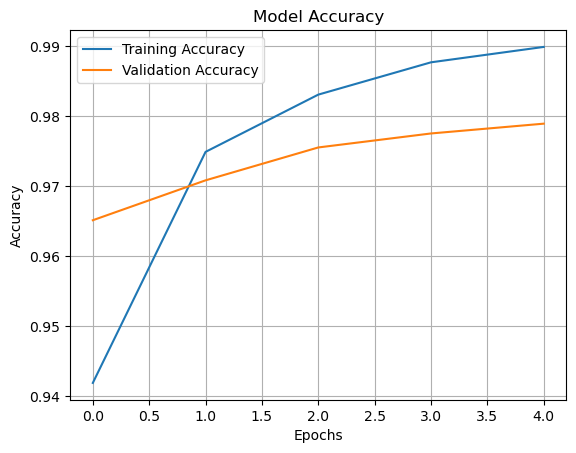

In [18]:
import matplotlib.pyplot as plt

# Plotting function
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_accuracy(history)

In [19]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9789
Test accuracy: 0.9789
